# KPIs

En esta libreta, partimos del dataframe que contiene toda la información de producción agrícola (SIAP), precios de mercado (SNIIM), IVF y variables climatólogicas.

Se generan nuevas columnas relaciondas a los KPIs.

### Importando librerías

In [54]:
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import moment, genextreme
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Cargando datos

In [38]:
directory = '../limpieza'

df = pd.read_csv(os.path.join(directory,"excedente_agrícola.csv"))

df.head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf
0,2020,1,Berenjena,Nayarit,60.00,0.00,0.0,0.00,0.000000,26.545455,18,19.612645,29.083726,13.741581,19.796194,26.256194,14.834145,11.615113,15.705790,92.821242,1.488903,63.214177,2.056097,60.4,763.0
1,2020,1,Berenjena,Yucatán,28.46,0.00,0.0,0.00,0.000000,5.830000,31,24.662450,30.634364,20.018247,24.568564,30.368262,19.961978,18.301996,21.435265,101.449988,0.637279,70.907876,0.629178,29.5,763.0
2,2020,1,Brócoli,Aguascalientes,440.00,0.00,0.0,0.00,0.000000,12.181818,1,11.871672,24.617947,3.252815,11.622434,19.955865,4.849208,2.336100,6.980059,79.269296,2.306334,59.219238,0.836100,38.5,138.1
3,2020,1,Brócoli,Baja California,886.46,815.81,0.0,12273.01,15.043956,26.710000,2,11.503548,21.848387,5.296516,12.156581,19.138839,7.561161,3.232000,7.694516,96.414323,2.328968,60.059871,0.225097,4.3,138.1
4,2020,1,Brócoli,Baja California Sur,1.90,0.00,0.0,0.00,0.000000,26.000000,3,18.086452,27.860968,12.222968,17.575806,24.043097,13.045290,10.594581,14.085290,99.619742,2.680968,67.542323,0.050258,1.9,138.1


### Beneficio

Este KIP nos dice el dinero que se perdió, en cosecha siniestrada, con respecto al recaudado con la cosechada. si el número es de signo positivo, se recaudó más, cosechada, que lo perdido, siniestrada, y si es negativo significa que se perdió más de lo que se ganó.

In [39]:
df['Beneficio'] = df.apply(lambda row: \
                 ((row['Superficie(ha)_Cosechada'] - row['Superficie(ha)_Siniestrada']) \
                    / row['Superficie(ha)_Cosechada']) * row['Precio'] \
                 if row['Superficie(ha)_Cosechada'] != 0 \
                 else 0.0, axis=1)

### Eficiencia

Este KPI nos dice la proporción de siniestrada con respecto a la cosechada, entre más grande el número más cultivo se pierde con respecto a lo que se cosecha.

In [41]:
df['Eficiencia'] = df.apply(lambda row: \
                 (row['Superficie(ha)_Siniestrada'] / row['Superficie(ha)_Cosechada']) \
                 if row['Superficie(ha)_Cosechada'] != 0 \
                 else 0.0, axis=1)

In [43]:
df['Presión_Superficial'] = df['Presión_Superficial']*10 # de kp a hp
df.head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf,Beneficio,Eficiencia
0,2020,1,Berenjena,Nayarit,60.00,0.00,0.0,0.00,0.000000,26.545455,18,19.612645,29.083726,13.741581,19.796194,26.256194,14.834145,11.615113,15.705790,9282.124194,1.488903,63.214177,2.056097,60.4,763.0,0.00,0.0
1,2020,1,Berenjena,Yucatán,28.46,0.00,0.0,0.00,0.000000,5.830000,31,24.662450,30.634364,20.018247,24.568564,30.368262,19.961978,18.301996,21.435265,10144.998783,0.637279,70.907876,0.629178,29.5,763.0,0.00,0.0
2,2020,1,Brócoli,Aguascalientes,440.00,0.00,0.0,0.00,0.000000,12.181818,1,11.871672,24.617947,3.252815,11.622434,19.955865,4.849208,2.336100,6.980059,7926.929619,2.306334,59.219238,0.836100,38.5,138.1,0.00,0.0
3,2020,1,Brócoli,Baja California,886.46,815.81,0.0,12273.01,15.043956,26.710000,2,11.503548,21.848387,5.296516,12.156581,19.138839,7.561161,3.232000,7.694516,9641.432258,2.328968,60.059871,0.225097,4.3,138.1,26.71,0.0
4,2020,1,Brócoli,Baja California Sur,1.90,0.00,0.0,0.00,0.000000,26.000000,3,18.086452,27.860968,12.222968,17.575806,24.043097,13.045290,10.594581,14.085290,9961.974194,2.680968,67.542323,0.050258,1.9,138.1,0.00,0.0


### Índice de estrés térmico

In [55]:
# Crea una columna de indice de stress termico
df['Rango_Temp_2_Metros'] = (df['Temp_2_Metros_MAX'] - df['Temp_2_Metros_MIN'])
df['Indice_estres_termico'] = df['Rango_Temp_2_Metros']/max(df['Rango_Temp_2_Metros'])

### Evapotranspiración potencial (ETP)

In [56]:
Ro = 5.5 * 0.408 # Valor promedio historico de la constante de radiación solar para mexico
df['Evapotranspiracion'] = 0.043 * (df['Temp_Superficial'] + 17.78) * Ro * (df['Temp_Superficial_MAX'] - df['Temp_Superficial_MIN'])**0.5

### SPEI y Balance Hídrico
Basado en: https://github.com/monocongo/climate_indices y https://spei.csic.es/home.html

In [57]:
# Definir una función para calcular el balance hídrico climático (D)
def climatic_water_balance(precip, evpt):
    """ 
    Precip y pet son series de Pandas con los datos mensuales de precipitación y evapotranspiración potencial
     Devuelve una serie de Pandas con el balance hídrico climático (D) para cada mes """
    return precip - evpt

# Definir una función para ajustar una distribución log-logística a los datos de D
def log_logistic_fit(D):
    """ 
    D es una serie de Pandas con el balance hídrico climático
    Devuelve los parámetros de la distribución log-logística ajustada por el método de los momentos-L """
    # Calcular los momentos-L
    mean_d = np.mean(D)
    std_d = np.std(D)
    skewness_d = moment(D, moment=3) / np.power(std_d, 3)
    kurtosis_d = moment(D, moment=4) / np.power(std_d, 4) - 3

    # Calcular los parámetros de la distribución log-logística
    alpha = std_d * np.sqrt(6) / np.pi
    beta = skewness_d * np.power(alpha, 2) / 2
    gamma = mean_d - 0.5772 * alpha / beta

    return alpha, beta, gamma

# Definir una función para calcular el SPEI simplificado a partir de D y los parámetros de la distribución
def spei(D, alpha, beta, gamma):
    """ 
    D: balance hídrico climático
    # alpha, beta y gamma son los parámetros de la distribución log-logística """
    F = st.logistic.cdf(D, loc=gamma, scale=alpha)  # Eliminar el argumento 'c'
    P = 1 - F  # Calcular la probabilidad de no excedencia de D
    SPEI = st.norm.ppf(P)  # Aplicar la transformación inversa de la normal estándar
    return SPEI

balance = climatic_water_balance(df['Precipitacion'], df['Evapotranspiracion'])
fit = log_logistic_fit(balance)

df['Balance_Hidrico'] = balance
df['SPEI'] = spei(balance, fit[0], fit[1], fit[2])
df.head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf,Beneficio,Eficiencia,Rango_Temp_2_Metros,Indice_stress_termico,Evapotranspiracion,Balance_Hidrico,SPEI,ICAE,Indice_estres_termico
0,2020,1,Berenjena,Nayarit,60.00,0.00,0.0,0.00,0.000,26.545,18,19.613,29.084,13.742,19.796,26.256,14.834,11.615,15.706,9282.124,1.489,63.214,2.056,60.4,763.0,0.00,0.0,11.422,0.553,14.132618,-12.076618,-0.315106,-0.328,0.553097
1,2020,1,Berenjena,Yucatán,28.46,0.00,0.0,0.00,0.000,5.830,31,24.662,30.634,20.018,24.569,30.368,19.962,18.302,21.435,10144.999,0.637,70.908,0.629,29.5,763.0,0.00,0.0,10.406,0.504,13.343434,-12.714434,-0.223877,NaN,0.503898
2,2020,1,Brócoli,Aguascalientes,440.00,0.00,0.0,0.00,0.000,12.182,1,11.872,24.618,3.253,11.622,19.956,4.849,2.336,6.980,7926.930,2.306,59.219,0.836,38.5,138.1,0.00,0.0,15.107,0.732,13.225033,-12.389033,-0.270496,-0.007,0.731538
3,2020,1,Brócoli,Baja California,886.46,815.81,0.0,12273.01,15.044,26.710,2,11.504,21.848,5.297,12.157,19.139,7.561,3.232,7.695,9641.432,2.329,60.060,0.225,4.3,138.1,26.71,0.0,11.578,0.561,11.495658,-11.270658,-0.429360,0.134,0.560651
4,2020,1,Brócoli,Baja California Sur,1.90,0.00,0.0,0.00,0.000,26.000,3,18.086,27.861,12.223,17.576,24.043,13.045,10.595,14.085,9961.974,2.681,67.542,0.050,1.9,138.1,0.00,0.0,10.998,0.533,13.685632,-13.635632,-0.091272,-0.426,0.532565


In [59]:
columnas = [
    'Superficie(ha)_Sembrada',
    'Superficie(ha)_Cosechada',
    'Superficie(ha)_Siniestrada',
    'Producción',
    'Rendimiento(udm/ha)',
    'Precio',
    'Temp_Superficial',
    'Temp_Superficial_MAX',
    'Temp_Superficial_MIN',
    'Temp_2_Metros',
    'Temp_2_Metros_MAX',
    'Temp_2_Metros_MIN',
    'Temp_2_Metros_Pto_Congelación',
    'Temp_2_Metros_Pto_Húmedo',
    'Presión_Superficial',
    'Velocidad_Viento',
    'Humedad_Relativa',
    'Precipitacion',
    'Precipitación',
    'Ivf',
    'Beneficio',
    'Eficiencia',
    'Rango_Temp_2_Metros',
    'Indice_estres_termico',
    'Evapotranspiracion',
    'Balance_Hidrico',
    'SPEI'
]

columnas_interes = [
    'Superficie(ha)_Sembrada',
    'Superficie(ha)_Cosechada',
    'Superficie(ha)_Siniestrada',
    'Producción',
    'Rendimiento(udm/ha)',
    'Precio'
]

<Axes: >

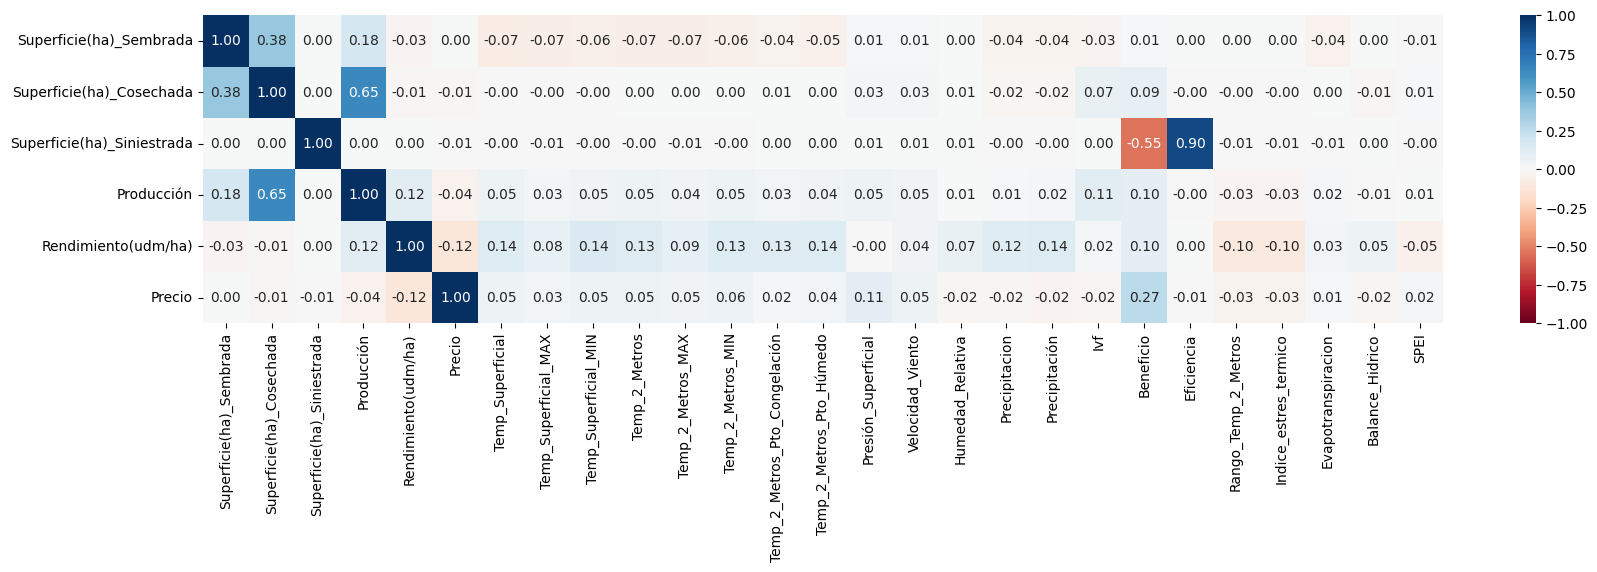

In [60]:
plt.figure(figsize = (20,4)) #cambiamos la variable quality_ord a int para calcular correlacion
corr_matrix = df[columnas].corr()
sns.heatmap(corr_matrix.loc[columnas_interes, columnas], annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

### Índice de Correlación AgroEconómica

In [61]:
# Cargando datos de correlación
directory = '../EDA/data'
df_corr_produccion_precio_anual = pd.read_csv(os.path.join(directory,"df_corr_produccion_precio_anual.csv"))
#df_corr_produccion_precio_anual.head()

In [62]:
# Se renombra la columna de correlación por el nombre del KPI
df_corr_produccion_precio_anual.rename(columns={"Corr_Producción_Precio":"ICAE"}, inplace=True)
df_corr_produccion_precio_anual

,Estado,Cultivo,Año,ICAE
0,Aguascalientes,Brócoli,2020,-0.006511
1,Aguascalientes,Brócoli,2021,-0.453055
2,Aguascalientes,Brócoli,2022,-0.310289
3,Aguascalientes,Brócoli,2023,0.545401
4,Aguascalientes,Calabacita,2021,0.350134
...,...,...,...,...
2004,Zacatecas,Tomate verde,2023,0.842413
2005,Zacatecas,Uva,2020,-0.429327
2006,Zacatecas,Uva,2021,-0.390927
2007,Zacatecas,Uva,2022,-0.841378


In [63]:
df = pd.merge(df, df_corr_produccion_precio_anual, how="left", on=["Estado", "Cultivo", "Año"])
df.head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precio,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion,Precipitación,Ivf,Beneficio,Eficiencia,Rango_Temp_2_Metros,Indice_stress_termico,Evapotranspiracion,Balance_Hidrico,SPEI,ICAE_x,Indice_estres_termico,ICAE_y
0,2020,1,Berenjena,Nayarit,60.00,0.00,0.0,0.00,0.000,26.545,18,19.613,29.084,13.742,19.796,26.256,14.834,11.615,15.706,9282.124,1.489,63.214,2.056,60.4,763.0,0.00,0.0,11.422,0.553,14.132618,-12.076618,-0.315106,-0.328,0.553097,-0.327736
1,2020,1,Berenjena,Yucatán,28.46,0.00,0.0,0.00,0.000,5.830,31,24.662,30.634,20.018,24.569,30.368,19.962,18.302,21.435,10144.999,0.637,70.908,0.629,29.5,763.0,0.00,0.0,10.406,0.504,13.343434,-12.714434,-0.223877,NaN,0.503898,NaN
2,2020,1,Brócoli,Aguascalientes,440.00,0.00,0.0,0.00,0.000,12.182,1,11.872,24.618,3.253,11.622,19.956,4.849,2.336,6.980,7926.930,2.306,59.219,0.836,38.5,138.1,0.00,0.0,15.107,0.732,13.225033,-12.389033,-0.270496,-0.007,0.731538,-0.006511
3,2020,1,Brócoli,Baja California,886.46,815.81,0.0,12273.01,15.044,26.710,2,11.504,21.848,5.297,12.157,19.139,7.561,3.232,7.695,9641.432,2.329,60.060,0.225,4.3,138.1,26.71,0.0,11.578,0.561,11.495658,-11.270658,-0.429360,0.134,0.560651,0.134023
4,2020,1,Brócoli,Baja California Sur,1.90,0.00,0.0,0.00,0.000,26.000,3,18.086,27.861,12.223,17.576,24.043,13.045,10.595,14.085,9961.974,2.681,67.542,0.050,1.9,138.1,0.00,0.0,10.998,0.533,13.685632,-13.635632,-0.091272,-0.426,0.532565,-0.425853


### Se guarda en CSV

In [64]:
df = df.round(3)
# save df to an excel file
df.to_excel('excedente_agrícola_kpi.xlsx', index=False)